## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\achou\Desktop\practice\1. Project\1. Diamond Price Prediction\Dataset\diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##### In some of the cases min value of "x", "y", "z" are zero, this indicates that there are faulty values in df that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty df points.

In [6]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [7]:
df.select_dtypes(include=['number']).columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

##### Clearly 20 df points had faulty dimension values and were thereby deleted

C:\Users\achou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\achou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\achou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will

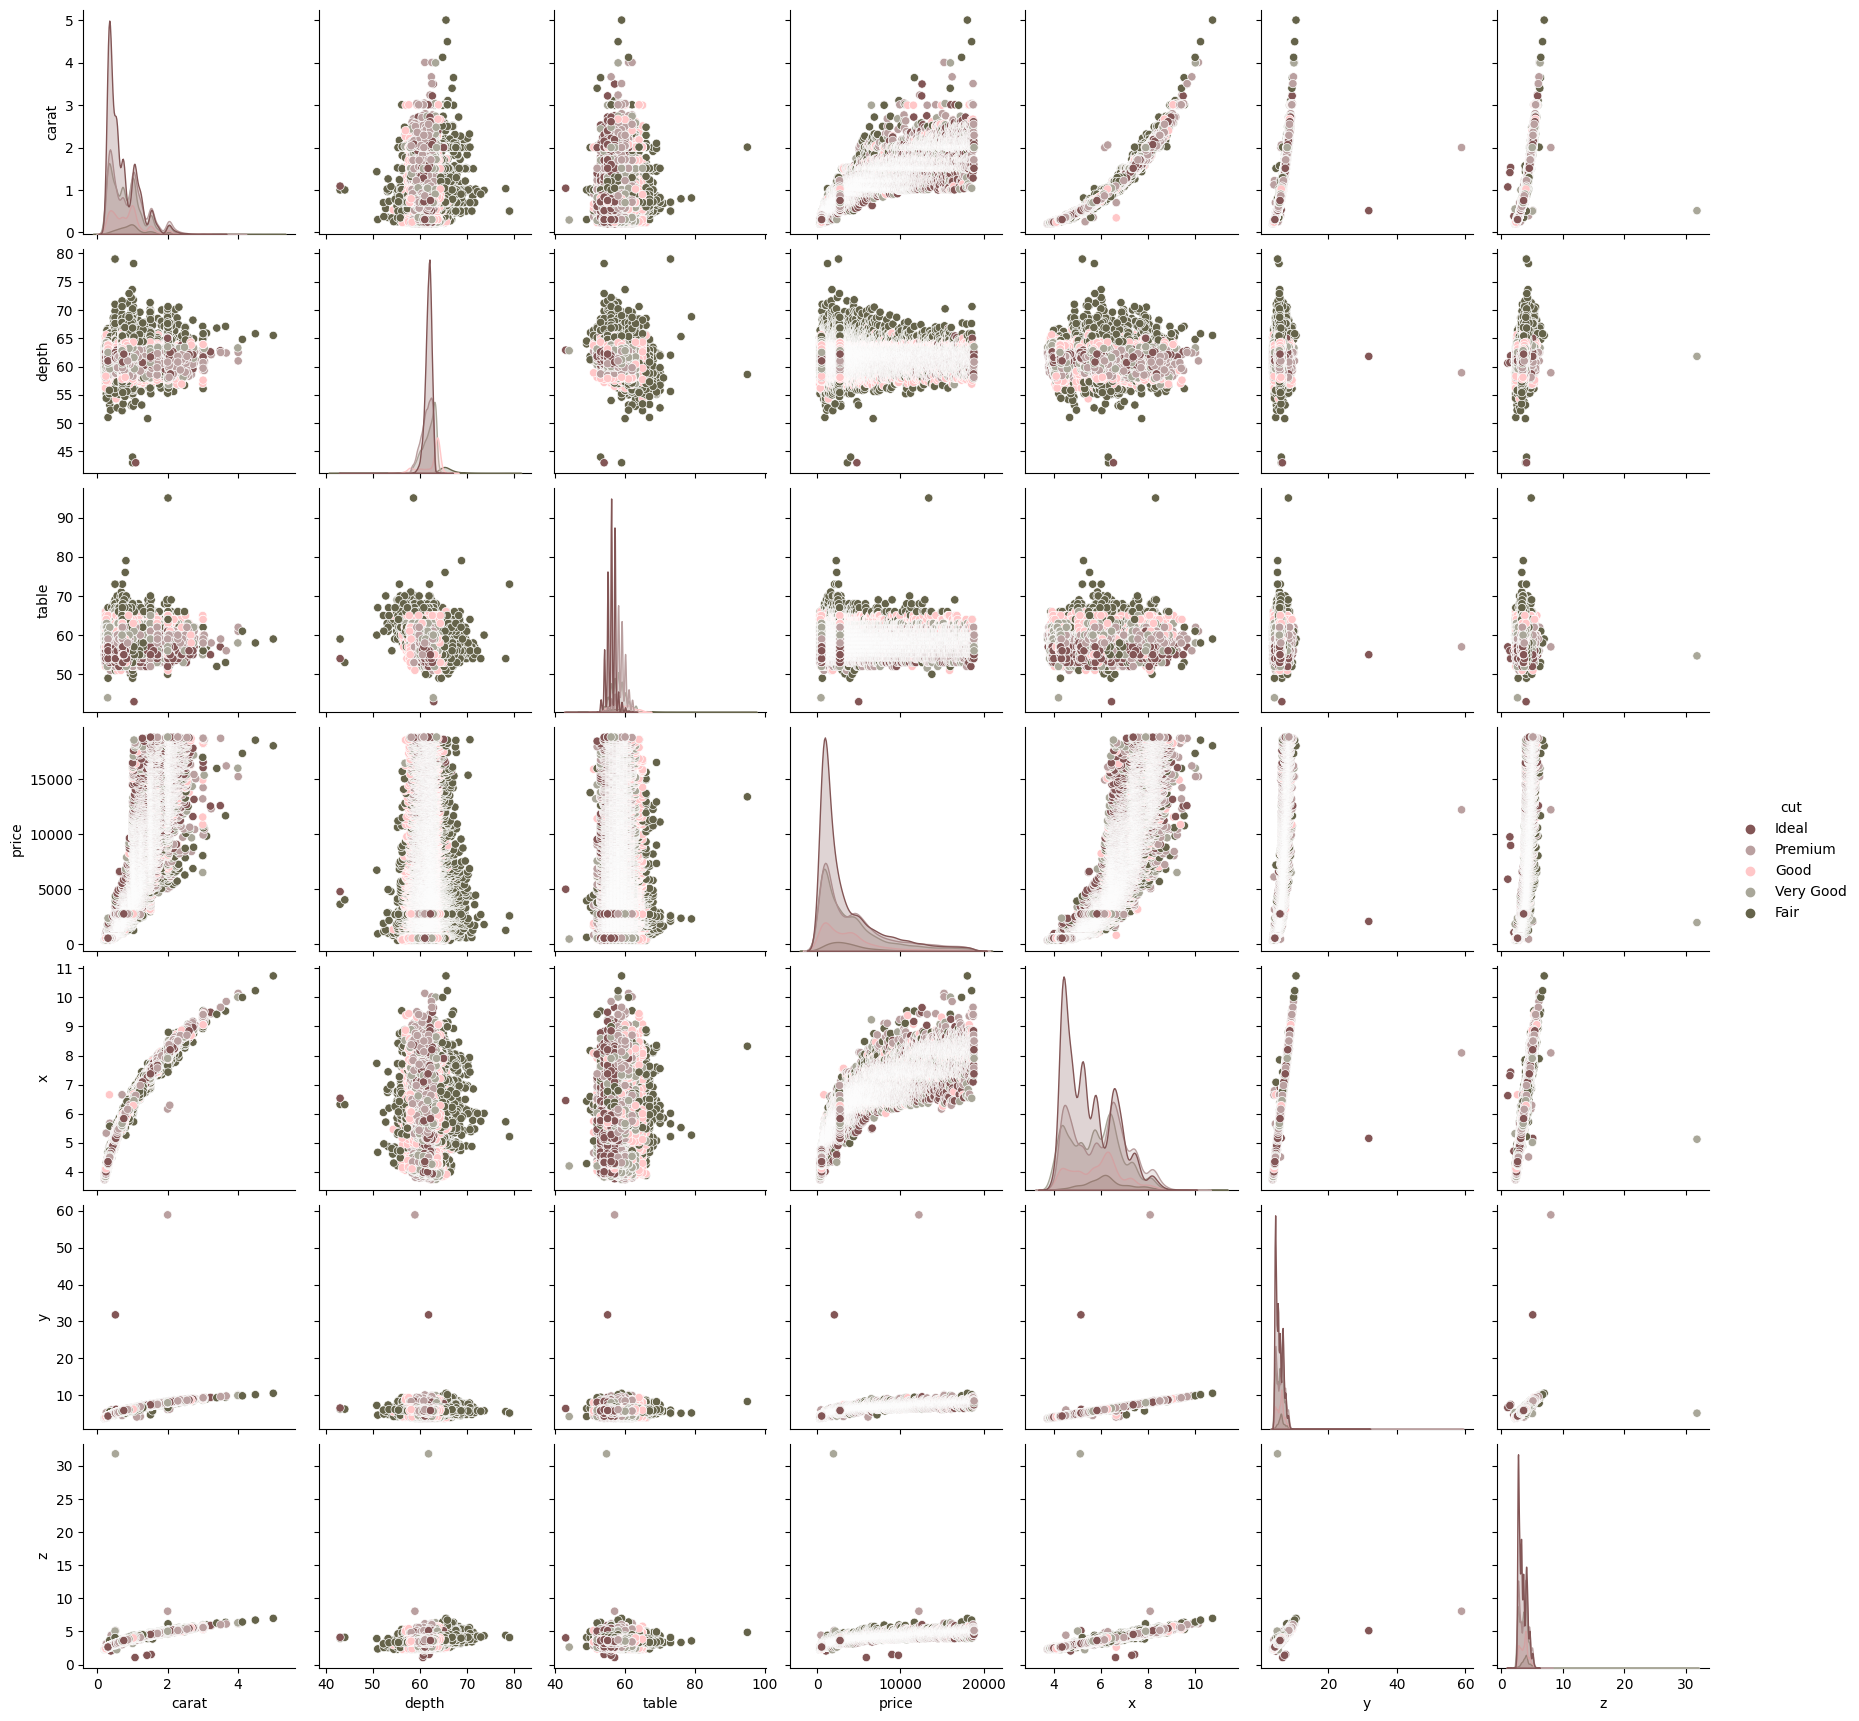

In [ ]:

shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]#shades for hue

ax=sns.pairplot(df, hue= "cut",palette=shade)
 
plt.show()

**A few points to notice in these pair plots**

There are some features with dfpoint that are far from the rest of the dfset which will affect the outcome of our regression model.

* "y" and "z" have some dimensional outlies in our dfset that needs to be eliminated.
* The "depth" should be capped but we must examine the regression line to be sure.
* The "table" featured should be capped too.
* Let's have a look at regression plots to get a close look at the outliers.

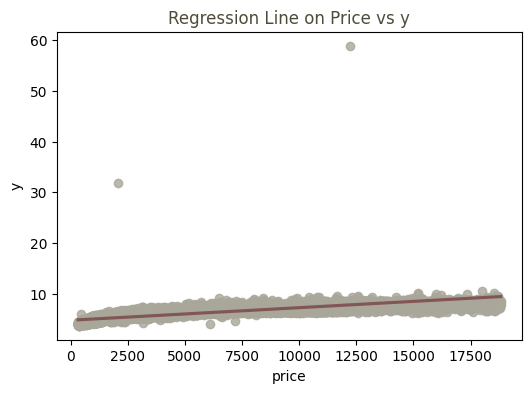

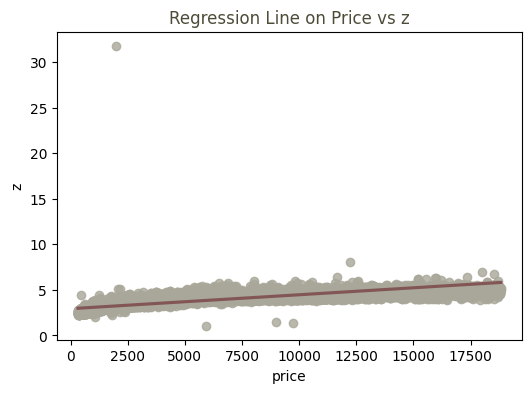

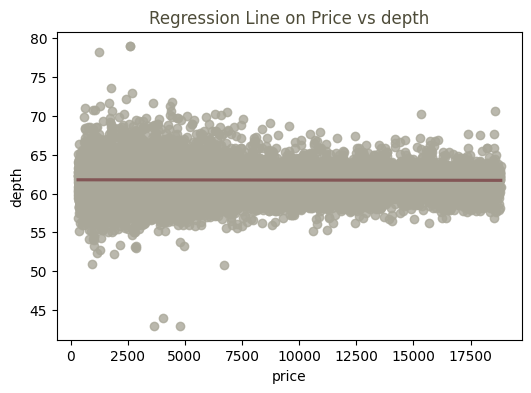

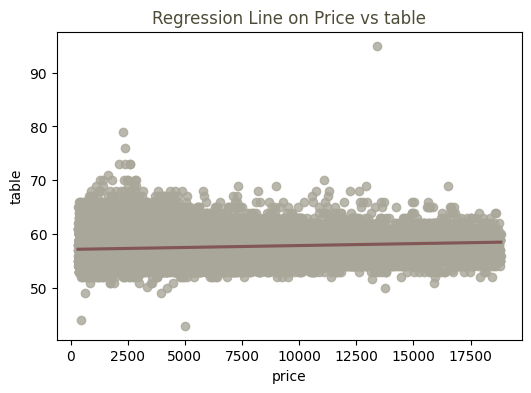

In [8]:
for val in ['y', 'z', 'depth', 'table']:
    plt.figure(figsize=(6, 4))
    ax = sns.regplot(x="price", y = val, data = df, fit_reg = True, scatter_kws={"color": "#a9a799"}, line_kws={"color": "#835656"})
    ax.set_title(f"Regression Line on Price vs {val}", color="#4e4c39")
    plt.show()

#### Dropping the outliers

In [9]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53907, 10)

In [10]:
ax=sns.pairplot(df, hue= "cut", palette=shade)
plt.show()

NameError: name 'shade' is not defined

In [ ]:
s = df.dtypes == 'object'
obj_cols = list(s[s].index)
obj_cols

In [ ]:
for val in obj_cols:
    plt.figure(figsize=(6,4))
    ax = sns.violinplot(x= val,y="price", data=df, palette=shade,scale= "count")
    ax.set_title(f"Violinplot For {val} vs Price", color="#4e4c39")
    ax.set_ylabel("Price", color="#4e4c39")
    ax.set_xlabel(val, color="#4e4c39")

##### Label encoding the categorical variables

In [ ]:
# Making copy to avoid changing original data 
label_data = df.copy()

# Applying label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in obj_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

In [ ]:
df.describe()

In [ ]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

**Points to notice:**
* "x", "y" and "z" show a high correlation to the target column. 
* "depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it. 



# Model Building

**Steps involved in Model Building**

* Setting up features and target
* Build a pipeline of standard scalar and model for five different regressors.
* Fit all the models on training data
* Get mean of cross-validation on the training set for all the models for negative root mean square error
* Pick the model with the best cross-validation score
* Fit the best model on the training set and get

In [ ]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [ ]:
# Building pipelins of standard scaler and model for various regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

**Testing the Model with the best score on the test set**

In the above scores, XGBClassifier appears to be the model with the best scoring on negative root mean square error. Let's test this model on a test set and evaluate it with different parameters. 

In [ ]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [ ]:
# Model Evaluation

print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline_xgb, file)

In [ ]:
! pip install flask

In [ ]:
import sklearn
import matplotlib
import seaborn
import sklearn
import xgboost

In [ ]:
print('numpy', np.__version__)
print('pandas', pd.__version__)
print('matplotlib', matplotlib.__version__)
print('seaborn', sns.__version__)
print('scikitlearn', sklearn.__version__)
print('xgboost', xgboost.__version__)